## KNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data pre processing 
# Note: Missing data and data selection is already handeled in given dataset
df_beijing = pd.read_csv('Beijing_labeled.csv')
df_shenyang = pd.read_csv('Shenyang_labeled.csv')
df_guangzhou = pd.read_csv('Guangzhou_labeled.csv')
df_shanghai = pd.read_csv('Shanghai_labeled.csv')
np.set_printoptions(threshold=np.inf)

data = df_beijing.append(df_shenyang, ignore_index = True)
X_Guangzhou = df_guangzhou.drop(['PM_HIGH'], axis = 1).values
Y_Guangzhou = df_guangzhou['PM_HIGH'].values
X_Shanghai = df_shanghai.drop(['PM_HIGH'], axis = 1).values
Y_Shanghai = df_shanghai['PM_HIGH'].values
Y = data['PM_HIGH'].values
X = data.drop(['PM_HIGH'], axis = 1).values

# Standardize
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

scaler.fit(X_Guangzhou)
X_Guangzhou = scaler.transform(X_Guangzhou)

scaler.fit(X_Shanghai)
X_Shanghai = scaler.transform(X_Shanghai)

# Split test/train 20/80
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

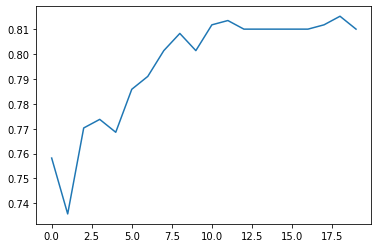

In [ ]:
# Weight: uniform
# Distance: Euclidian
from sklearn.metrics import accuracy_score
import seaborn as sns

#Euclidian distance helper function
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNNClassifier():
    def __init__(self, n_neighbours):
        self.k = n_neighbours

    def fit(self,x,y):
        self.X_train = x
        self.Y_train = y

    def predict(self, x_test):
        return [self.predict_x(x) for x in x_test]
    
    # Helper function, predict class of only one point
    def predict_x(self, x):
        distances = np.array([distance(x, x_train) for x_train in X_train])
        # find indexes of k lowest values (the k neighbours)
        n_idx = np.argpartition(distances, self.k)[0:self.k] 

        # Predict the state most neigbours has
        class_count = [0,0]
        for idx in n_idx:
            class_count[int(self.Y_train[idx])] += 1
        return(class_count.index(max(class_count)))

    def score(self, x_test,y_test) :
        y_pred = self.predict(x_test)
        return accuracy_score(y_test, y_pred)

acc = np.array([])
for i in range(20):
    KNN = KNNClassifier(i)
    KNN.fit(X_train, y_train)
    acc = np.append(acc, [KNN.score(X_test, y_test)])

# Plot what number or neigbours give the best accuracy score, we found 9 to be the lowest number that still perform well
sns.lineplot(np.arange(20), acc)




In [ ]:
KNN = KNNClassifier(9)
KNN.fit(X_train, y_train)
print(KNN.score(X_test, y_test))

0.7438934122871946


In [ ]:
KNN = KNNClassifier(9)
KNN.fit(X_train, y_train)
# evaluation of guangzhi and shanghai
print(KNN.score(X_Shanghai, Y_Shanghai))
print(KNN.score(X_Guangzhou, Y_Guangzhou))


0.7364914877868246
0.738905325443787


In [ ]:
# We also printed the accuracies from scikits model to see if we were performing ok.
# We found the accuracies to be very close
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
print(neigh.score(X_test, y_test))
print(neigh.score(X_Shanghai, Y_Shanghai))
print(neigh.score(X_Guangzhou, Y_Guangzhou))

0.7737478411053541
0.7298297557364914
0.7174556213017751


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a625f0e9-882e-4914-9c38-da591b9d5413' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>